<a href="https://colab.research.google.com/github/RobSmyth23/DataAnalytics/blob/main/DataAnalyticsCA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics CA 2
### T00145976
### Robert Smyth

#### Aim: Analyse a dataset using the CRISP-DM methodology
#### Dataset is a list of Steam Games withe their title, publisher, price and player count, along with other columns.

###Goal: To accuratly predict a steam games price based on the given information in the dataset using the CRISP-DM methodology and regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import joblib

The following will follow CRISP-DM to predict Steam Game Prices by using Linear Regression. I will be using the dataset steamGames in order to do this.
Columns in the dataset such as DLC count, Price, Languages and Release Year will be used to assist this goal.


##1. Business Understanding
#
#
### Game developers and game companies waould want to estimate appropriate pricing for their soon to be released game(s) using available information.

## Success Criteria: Creating a regression model that will accuratly be  able to predict a games price using error statistics and visual comparisons of actual and predicted prices.

In [16]:
df = pd.read_csv('games.csv', engine='python', encoding='utf-8', on_bad_lines='skip')

df.head()
df.info()
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       6809 non-null   int64  
 1   Name                        6809 non-null   object 
 2   Release date                6809 non-null   object 
 3   Estimated owners            6809 non-null   object 
 4   Peak CCU                    6809 non-null   int64  
 5   Required age                6809 non-null   int64  
 6   Price                       6809 non-null   float64
 7   DLC count                   6809 non-null   int64  
 8   About the game              6642 non-null   object 
 9   Supported languages         6809 non-null   object 
 10  Full audio languages        6809 non-null   object 
 11  Reviews                     988 non-null    object 
 12  Header image                6809 non-null   object 
 13  Website                     3490 

,0
AppID,0
Name,0
Release date,0
Estimated owners,0
Peak CCU,0
Required age,0
Price,0
DLC count,0
About the game,167
Supported languages,0


### Data Understanding

## This dataset contains over 6,800 games along with 39 pieces of information i.e. columns about a certain game. These include numeric, boolean and text fields.

## The key columns for my analysis are:

- Price, as a float
- Estimate Owners as an object
- Peak CCU (concurrent users)
- Required Age
- Amount of DLC's (downloadable content, post purchase of initial game)
-Release Date
-Supported Languages

In [17]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


The first couple rows in the dataset shows numeric columns such as Price and CCU are already clean. However, the text columns such as About and Publishers may contain line breaks and this caused many, many issues at the start of this notebook.

### Exploratory Analysis

## I will now explore the key numeric variables and check for any missing or null values.

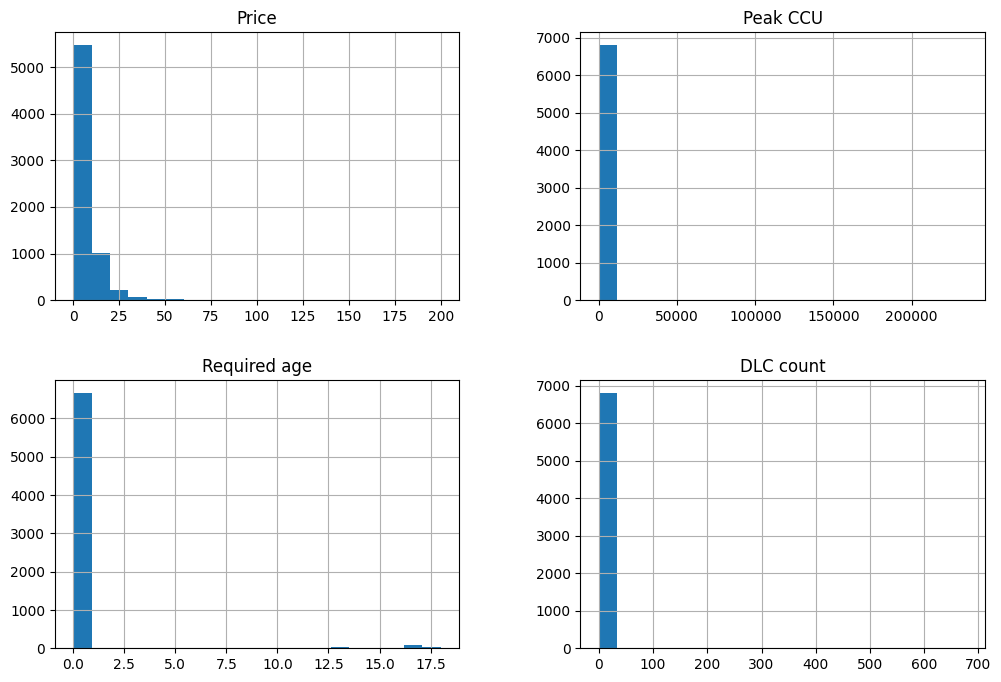

,0
About the game,167
Reviews,5821
Website,3319
Support url,3205
Support email,1043
Metacritic url,6423
Score rank,6803
Notes,5864
Developers,175
Publishers,203


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

#Histograms
numeric_columns = ['Price', 'Peak CCU', 'Required age', 'DLC count']
df[numeric_columns].hist(bins=20, figsize=(12,8))
plt.show()

missing_val = df.isnull().sum()
missing_val[missing_val > 0]


## Observations:
-Several columns of text (`About the game`, `Reviews`, `Notes`, `Website`, etc.) have missing values.
-Most of these columns arent needed for the predictions of prices so i will ignore these.
-Some key features such as (`Price`, `Peak CCU`, `Required age`, `DLC count`) have no missing values. This is good for my regression model.
-The 'Score Rank' is missing in most of the rows, so i will also exclude this from my model.

##
##

##Histogram Observations

- Price has a skewed distribution, therfore I might manipulate this further.
- Most games are inexpensive, i.e. under fifty dollars.
-The peak CCU is also skewed, most games have low peak concurrent users. This could affect the regression.
-Required age and DLCs are smaller integers.

##Transformation

-I will change release date to release year.
-I will change estimated owners from a range to an average figure.
- I will also count the number of supported languages as a figure instead of text fields.
- I will also now drop all the text columns I wont be using e.g. (AppID, Name, About the game, Reviews)

In [22]:
# Transform the Release Date
df['release_year'] = pd.to_datetime(df['Release date'], errors='coerce').dt.year

# Convert Estimated owners to numeric average
def owners_to_avg(val):
    try:
        low, high = val.split(' - ')
        return (int(low) + int(high)) / 2
    except:
        return np.nan

df['Estimated owners avg'] = df['Estimated owners'].apply(owners_to_avg)

# Count number of supported languages
df['num_languages'] = df['Supported languages'].apply(lambda x: len(eval(x)) if x != '[]' else 0)

# Drop columns I won't use
cols_to_drop = ['AppID', 'Name', 'Release date', 'Estimated owners', 'About the game',
    'Reviews', 'Website', 'Support url', 'Support email', 'Header image',
    'Full audio languages', 'Metacritic url', 'Score rank', 'Notes',
    'Developers', 'Publishers', 'Categories', 'Genres', 'Tags',
    'Screenshots', 'Movies']

df_model = df.drop(columns=cols_to_drop)

# Check transformed data
df_model.head()

,Peak CCU,Required age,Price,DLC count,Supported languages,Windows,Mac,Linux,Metacritic score,User score,...,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,release_year,Estimated owners avg,num_languages
0,0,0,19.99,0,['English'],True,False,False,0,0,...,11,30,0,0,0,0,0,2008.0,10000.0,1
1,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",True,True,False,0,0,...,5,12,0,0,0,0,0,2017.0,10000.0,10
2,0,0,4.99,0,"['English', 'Portuguese - Brazil']",True,False,False,0,0,...,0,0,0,0,0,0,0,2021.0,10000.0,2
3,0,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",True,True,True,0,0,...,0,0,0,0,0,0,0,2020.0,10000.0,11
4,0,0,0.00,0,"['English', 'Spanish - Spain']",True,True,False,0,0,...,8,17,0,0,0,0,0,2020.0,10000.0,2


### Results of Transforming

+ I extracted 'release_year' from 'Release date' in order to get a representaion of the games age.

+ I converted 'Estiated Owners' ranges to numeric values on average(`Estimated owners avg`).

+ I calculated the number of supported languages as 'num_languages'.

+ I dropped irrelevant text field comlumns which wont be needed for predicting the price.

+ The resulting dataset now contains all the columns needed to create the regression model.

## Preparation

- Here I will handle all the missing values within the transformed columns e.g. Release Year and Estimated Avg Owners

- I will use X as features and y=Price as the target.

- Iwill also seperate the dataset into training and test sets.

In [25]:
# Handle missing values with the median
imputer = SimpleImputer(strategy='median')
df_model[['release_year', 'Estimated owners avg']] = imputer.fit_transform(
    df_model[['release_year', 'Estimated owners avg']]
)

# Features and target
X = df_model.drop('Price', axis=1)
y = df_model['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
X_train.shape, X_test.shape

((5447, 20), (1362, 20))

### Outcome

+ Missing values in release year and estimated avg owners were replaced with the median value.

+ The features, X, include Peak concurrent users, required age, DLCs, release year, estimated avg owners and number of languages.

+ The target variable Y is the Price.

+ The dataset was split into training and test sets in order to evaluate the regressions performance.

+Note: Some values are still objects/strings. Therefore as linear regression only accepts numeric input i need to  convert these string/object types to be numberic e.g. counts or drop them if not possible.

In [34]:
X_train.dtypes
X_train.select_dtypes(include=['object']).columns
X_train['num_languages'] = pd.to_numeric(X_train['num_languages'], errors='coerce').fillna(0)
X_test['num_languages'] = pd.to_numeric(X_test['num_languages'], errors='coerce').fillna(0)


In [35]:
# If Supported languages looks like a list string e.g., "['English', 'French']"
X_train['num_languages'] = X_train['Supported languages'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)
X_test['num_languages'] = X_test['Supported languages'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)


In [36]:
columns_to_drop = ['About the game', 'Reviews', 'Notes', 'Website', 'Support url', 'Support email',
                   'Metacritic url', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags',
                   'Screenshots', 'Movies', 'Header image']

X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')


In [37]:
X_train.dtypes


,0
Peak CCU,int64
Required age,int64
DLC count,int64
Supported languages,object
Windows,bool
Mac,bool
Linux,bool
Metacritic score,int64
User score,int64
Positive,int64


# Modelling

- I will now use Scikit-Learn for linear regression and train the model on the training set.

- I will also make predictions beased on the test set.

In [40]:
X_train.select_dtypes(include=['object']).columns
# Convert string representation of lists to actual length
for col in ['Supported languages']:
    X_train[col] = X_train[col].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)
    X_test[col] = X_test[col].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)


In [41]:
print(X_train.dtypes)


Peak CCU                        int64
Required age                    int64
DLC count                       int64
Supported languages             int64
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
User score                      int64
Positive                        int64
Negative                        int64
Achievements                    int64
Recommendations                 int64
Average playtime forever        int64
Average playtime two weeks      int64
Median playtime forever         int64
Median playtime two weeks       int64
release_year                  float64
Estimated owners avg          float64
num_languages                   int64
dtype: object


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

pd.DataFrame({'Actual': y_test.values[:10], 'Predicted': y_pred[:10]})


,Actual,Predicted
0,7.99,6.544856
1,4.99,42.510302
2,0.99,6.465144
3,2.99,6.642659
4,4.79,6.332449
5,5.99,6.308295
6,20.99,12.887571
7,0.59,6.571326
8,4.99,5.371882
9,4.99,5.705885


## Evaluation

-The regression seems to be working for me now, so now I will see how well it is functioning.